# THE SPARKS FOUNDATION- DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

# TASK 1-PREDICTION USING SUPERVISED ML, BY MANASI BATHE 
Predict the percentage of an student based on the no. of study hours.


## IMPORTING LIBRARIES

In [14]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## IMPORTING DATASHEET

In [3]:
#importing datasheet
link='http://bit.ly/w-data'
data=pd.read_csv(link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#print first five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#print last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
data.shape

(25, 2)

In [18]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#check whether their is null value in datasheet
data.isnull ==True

False

NO NULL VALUE PRESENT IN THE DATA SHEET.

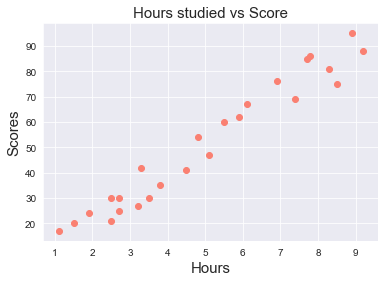

In [35]:
#Plotting a Scatter Plot
sns.set_style('darkgrid')
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Hours studied vs Score', fontsize=15)
plt.scatter(data.Hours, data.Scores, color='salmon')
plt.show()

In [19]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


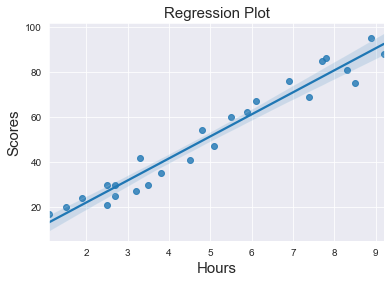

In [36]:
#ploting a Regression Plot
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Regression Plot', fontsize=15)
plt.show()

VARIABLES ARE POSITIVELY CORRELATED

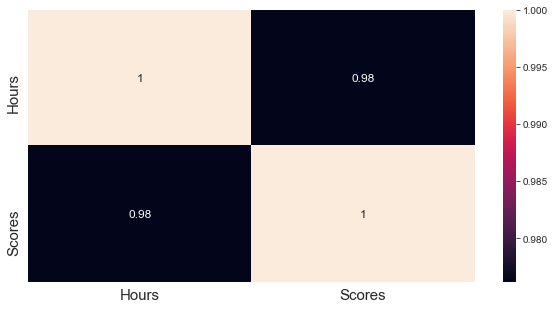

In [37]:
#heatmap using seaborn to check the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,annot_kws={'fontsize':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### SPLITTING THE DATA

In [15]:
#defining x and y from the data
x= data.iloc[:, :-1].values
y= data.iloc[:, 1].values

#splitting the data into two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

### FITTING THE DATA INTO TRAINING SET

In [16]:
reg= LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

### PREDICTING THE MARKS

In [20]:
y_pred= reg.predict(val_x)

In [21]:
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

### COMPARING ACTUAL MARKS AND PREDICTED MARKS

In [25]:
#comparing Actual vs Predicted
compare= pd.DataFrame({'Actual': val_y, 'Preddicted': y_pred})
compare

,Actual,Preddicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### VISUALLY COMPARING ACTUAL MARKS WITH PREDICTED MARKS

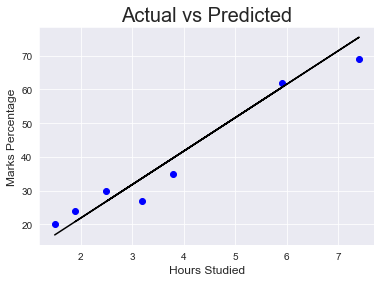

In [38]:
plt.scatter(x=val_x, y=val_y, color='blue')
plt.plot(val_x, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

###  EVALUTING THE MODEL

In [29]:
#calculating the accuracy of model
print('Mean absolute error:',mean_absolute_error(val_y, y_pred))

Mean absolute error: 4.130879918502486


### WHAT WILL BE THE PREDICTED SCORE IF THE STUDENT STUDIES FOR 9.25 HOURS/DAY?

In [40]:
hours = [9.25]
ans = reg.predict([hours])
print("Score = {}".format(round(ans[0],3)))

Score = 93.893


IF A STUDENT TRIES TO STUDY FOR 9.25 HOURS/DAY, HE/SHE IS LIKELY TO SCORE 93.89 MARKS